In [2]:
#package for reading dicoms (the file type that MR images are usually in)
pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.0 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow-io

ERROR: Could not find a version that satisfies the requirement tensorflow-io (from versions: none)
ERROR: No matching distribution found for tensorflow-io
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import pydicom
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg

import os

In [16]:
alzheimers_dcm_dir="/Users/aniqa.arif/Desktop/Machine Learning_6156/Project/ADNI_data/ADNI_DCM"

# r=root, d=directories, f = files
for r, d, f in os.walk(alzheimers_dcm_dir):
    for file in f:
        if file.endswith(".dcm"):
            filepathname=os.path.join(r, file)
            fileparts=filepathname.split()
            print(fileparts)
            break;
            #if(int(fileparts[-3])
            #print(os.path.join(r, file))
    #break;
    
    
    #we had trouble with skull removal so we have left this dataset for future works.


['/Users/aniqa.arif/Desktop/Machine', 'Learning_6156/Project/ADNI_data/ADNI_DCM/mild/023_S_4501/Axial_T2-FLAIR/2014-05-07_11_28_58.0/I424238/ADNI_023_S_4501_MR_Axial_T2-FLAIR_br_raw_20140509102547287_25_S218223_I424238.dcm']
['/Users/aniqa.arif/Desktop/Machine', 'Learning_6156/Project/ADNI_data/ADNI_DCM/mild/099_S_4475/Axial_T2-FLAIR/2013-02-26_11_40_26.0/I361282/ADNI_099_S_4475_MR_Axial_T2-FLAIR_br_raw_20130226115658154_10_S183135_I361282.dcm']
['/Users/aniqa.arif/Desktop/Machine', 'Learning_6156/Project/ADNI_data/ADNI_DCM/mild/011_S_2274/Axial_T2-FLAIR/2015-02-03_07_31_05.0/I472319/ADNI_011_S_2274_MR_Axial_T2-FLAIR_br_raw_20150206102256522_12_S247853_I472319.dcm']
['/Users/aniqa.arif/Desktop/Machine', 'Learning_6156/Project/ADNI_data/ADNI_DCM/mild/035_S_4582/Axial_T2-FLAIR/2015-03-25_12_39_46.0/I486918/ADNI_035_S_4582_MR_Axial_T2-FLAIR_br_raw_20150414115828645_10_S255682_I486918.dcm']
['/Users/aniqa.arif/Desktop/Machine', 'Learning_6156/Project/ADNI_data/ADNI_DCM/mild/035_S_4582/Axia

['/Users/aniqa.arif/Desktop/Machine', 'Learning_6156/Project/ADNI_data/ADNI_DCM/none/003_S_4119/Axial_FLAIR/2012-08-28_14_06_33.0/I333867/ADNI_003_S_4119_MR_Axial_FLAIR__br_raw_20120913094518393_5_S167339_I333867.dcm']
['/Users/aniqa.arif/Desktop/Machine', 'Learning_6156/Project/ADNI_data/ADNI_DCM/none/003_S_4119/Axial_FLAIR/2012-02-21_12_41_29.0/I287294/ADNI_003_S_4119_MR_Axial_FLAIR__br_raw_20130702121832462_9_S142185_I287294.dcm']
['/Users/aniqa.arif/Desktop/Machine', 'Learning_6156/Project/ADNI_data/ADNI_DCM/none/003_S_4119/Axial_FLAIR/2013-07-31_09_19_39.0/I384085/ADNI_003_S_4119_MR_Axial_FLAIR__br_raw_20130801160339367_9_S197120_I384085.dcm']
['/Users/aniqa.arif/Desktop/Machine', 'Learning_6156/Project/ADNI_data/ADNI_DCM/none/098_S_4018/Axial_FLAIR/2013-05-06_15_39_40.0/I373285/ADNI_098_S_4018_MR_Axial_FLAIR__br_raw_20130520163138099_8_S190138_I373285.dcm']
['/Users/aniqa.arif/Desktop/Machine', 'Learning_6156/Project/ADNI_data/ADNI_DCM/none/094_S_4649/Axial_FLAIR/2016-06-09_11_22

In [11]:
#slice 35 seems to be on the brain gap, we can take slices 30-55 for learning 
dataset=pydicom.dcmread("ADNI_002_S_1070_MR_Axial_PD_T2_FSE__br_raw_20091211070203100_81_S77165_I160752.dcm")

In [12]:
dataset

/Users/aniqa.arif/miniconda3/envs/itcs-6156/lib/python3.8/site-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.07744846286063339524'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.16.124.113543.6006.99.07744846286063339524
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.124.113543.6006.99.8067347773067732742
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_354'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 1044
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 2.16.124.113543.6006.99.077448

(256, 256)


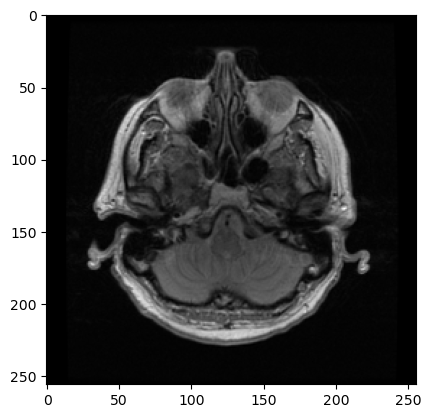

In [13]:
img=dataset.pixel_array
print(img.shape)
plt.imshow(img,cmap='gray')

In [14]:
plt.imsave("sample_eyes_mri.tiff",img,cmap='gray')
plt.imsave("sample_eyes_mri.jpeg",img,cmap='gray')

In [99]:
#decreasing size by a factor of 2
#img = img[::2, ::2]

Our Image looks quite smooth already, so though raw mri images are applied a gaussian filter to smooth the image, our images are a prepared dataset from ADNI so I think we don't need to do that. Our images look quite clean already.

For reference, here's a sample of an MRI image that is noisy (left image):

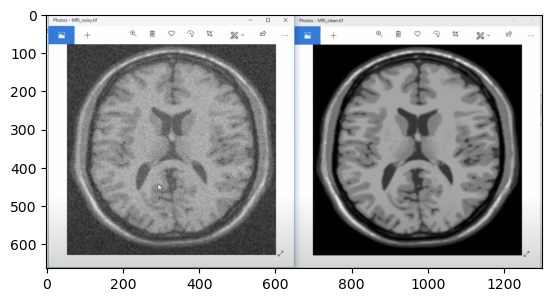

In [107]:
img_n = mpimg.imread('noisy-vs-clean.png')
plt.imshow(img_n)

In [100]:
print(img.shape)

(256, 256)


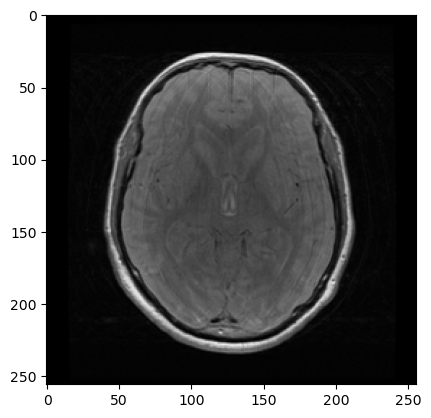

In [101]:
plt.imshow(img,cmap='gray')

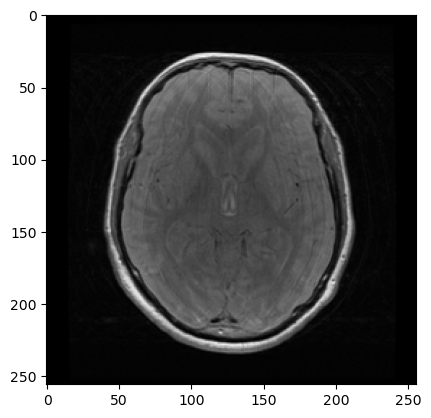

In [102]:
#scaling the input images for efficient learning 
img = img / 255
plt.imshow(img,cmap='gray')

In [103]:
# Reshape the image as a tensor for tensorflow/keras input
img = np.reshape(img, (-1, 256, 256, 1))

In [104]:
size = (128, 128)

img = tf.keras.preprocessing.image.smart_resize(
    img, size, interpolation='bilinear'
)

In [105]:
img.shape

(1, 128, 128, 1)

In [ ]:
#img- Ready for input into ML model.